In [1]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
import pandas as pd
import os
import seaborn as sns
import joblib
import cv2
from tqdm import tqdm
from scipy.io import wavfile as wav
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
metadata=pd.read_csv('Audio_dataset/audio_2.csv')
df= metadata.copy()
df1 = df['class'].value_counts()
df['Counts'] = np.zeros(len(df))
grp_df = df.groupby(['class']).count()
audio_file_path='Audio_dataset/testing_audio/7066-6-1-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
wave_sample_rate, wave_audio = wav.read(audio_file_path)
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)

In [13]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [09:48,  7.27it/s]C:\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [22:24,  8.27it/s]C:\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8754it [23:34,  6.19it/s]


In [14]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])

X=(extracted_features_df['feature'])
y=(extracted_features_df['class'])

### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

def predImg():
    img1_path = 'Audio_dataset/images/maaz.jpg'
    img2_path = 'Audio_dataset/images/mrbrou.jpeg'
    img3_path = 'Audio_dataset/images/Yao.jpeg'
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    img3 = cv2.imread(img3_path)
    RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    RGB_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
    
    if (predicted_label == 'mr_maaz'):
        plt.imshow(RGB_img1)
    elif (predicted_label == 'mr_florentin'):
        plt.imshow(RGB_img3)
    elif (predicted_label == 'mr_brou'):
        plt.imshow(RGB_img2)

# ML Model 

In [16]:
DecisionTree_Class_Model = DecisionTreeClassifier()
DecisionTree_Class_Model.fit(X_train,y_train)
y_pred = DecisionTree_Class_Model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.6974885844748858

# K Neighbors Classifier

In [17]:
classifer = KNeighborsClassifier()
###Train model
model = classifer.fit(X, y)
###Save model as pickle file
joblib.dump(model, "audioClass14.pkl")
#classifer = joblib.load("audioClass14.pkl")

['audioClass14.pkl']

In [18]:
classifer = joblib.load("audioClass14.pkl")

# Show time

bro
['mr_brou']


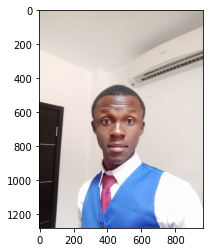

In [21]:
filename="Audio_dataset/testing_audio/"+input()+".wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_label=model.predict(mfccs_scaled_features)
#y_pred = knn.predict(mfccs_scaled_features)

print(predicted_label)
predImg()


# Logistic Regression

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.5593607305936074


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XG

In [23]:
model_1 = XGBClassifier()
model_1.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [91]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [876, 1]

Text(0, 0.5, 'Mean Error')

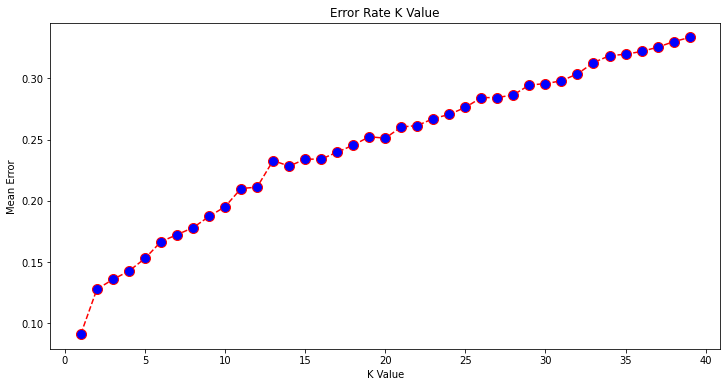

In [92]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

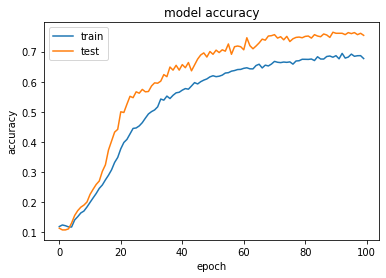

In [281]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test', 'val'], loc='upper left')
plt.show()

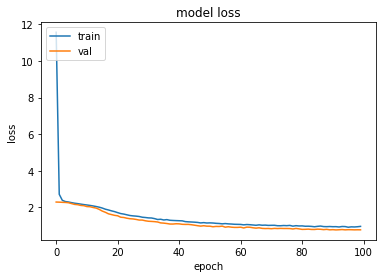

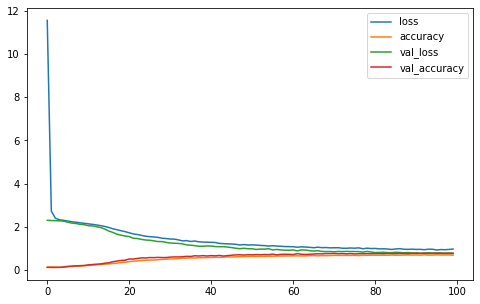

In [282]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

